# compare BNB - EXTBNB data to all pairs in our overlay sample

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from matplotlib.pylab import *
import matplotlib.patches as patches
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.513588052763 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


# import data

In [2]:
debug = 1
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/BNBextBNBvsOverlay/'

In [3]:
Nevents

{'MC-BNB/Cosmic-DATA overlay': 91446,
 'MC-BNB/Cosmic-DATA overlay POT': 9.5991329499999994e+19,
 'MC-BNB/Cosmic-MC overlay': 358800,
 'MC-BNB/Cosmic-MC overlay POT': 3.61901e+20,
 'OffBeam after sof.trig.': 380602,
 'OffBeam before sof.trig.': 8529852.084267145,
 'OffBeam sof.trig. efficiency': 0.04462,
 'OnBeam POT': 4.93e+19,
 'OnBeam after sof.trig.': 544114,
 'OnBeam before sof.trig.': 10596183.05744888,
 'OnBeam sof.trig. efficiency': 0.05135,
 'v04 after sof.trig.': 378787,
 'v05 after sof.trig.': 1815}

## (1) Off-Beam from two samples
the infamous "inconsistent process history" issue
separate the list into two lists 
corresponding to files that were swizzled using v04_26_04_% and v05_08_00_%

In [4]:
OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v04_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v05_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print len(OffBeam),'pairs from Off-Beam'
print len(OffBeamFV),'pairs from Off-Beam in FV'

104447 pairs from Off-Beam
64134 pairs from Off-Beam in FV


## (2) On-Beam sample

In [5]:
OnBeam = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_bnb_v8_mcc8_vertices.csv')
OnBeamFV = sample_in_FV(OnBeam)
print len(OnBeam),'pairs from On-Beam'
print len(OnBeamFV),'pairs from On-Beam in FV'

162057 pairs from On-Beam
100379 pairs from On-Beam in FV


## (3) MC-BNB + Cosmic DATA overlay 

In [6]:
MC_scaling_DATAcosmic = Nevents['OnBeam POT']/Nevents['MC-BNB/Cosmic-DATA overlay POT']
print "MC_scaling_DATAcosmic:",MC_scaling_DATAcosmic,"= N(POT on beam)/N(POT MC)"
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples(filename='ecohen_physical_files_adi_prodgenie_bnb_nu_uboone_overlay_cosmic_data_100K_reco2_2018_02_23_vertices')
cuts_pureff = apply_cuts_MCbnbDATAcosmic()
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

MC_scaling_DATAcosmic: 0.513588052763 = N(POT on beam)/N(POT MC)
28674 pairs from MC-BNB + cosmic DATA overlay
18908 pairs in FV
5087 are 1mu-1p, 26.9%
4335 are other pairs, 22.9%
9486 are cosmic, 50.2%
--------------------------------------------------------------
2514 are CC 1p 0pi, 13.3%


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.9%,100.0%,13.3%,no cut,100.0% (5087),100.0% (4335),100.0% (9486),100.0% (2514)
PIDa,85.4%,53.6%,84.5%,26.2%,${PID}_a>13$,85.4% (4345),55.3% (2398),14.4% (1368),84.5% (2124)
flashes,85.1%,55.9%,84.2%,27.3%,$N_{flashes}>0$,85.1% (4328),55.1% (2390),10.8% (1020),84.2% (2116)
flash,80.4%,57.9%,79.3%,28.3%,optical filter,80.4% (4089),53.2% (2306),7.0% (662),79.3% (1994)
length,66.6%,67.4%,69.5%,34.7%,$l_{\mu}>l_{p}$,66.6% (3390),29.3% (1271),3.9% (370),69.5% (1746)
non-collinearity,59.7%,73.4%,64.6%,39.3%,"$|\theta_{1,2}-90^0|<55^0$",59.7% (3039),20.7% (899),2.1% (202),64.6% (1625)
vertex activity,40.7%,76.9%,55.5%,51.9%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",40.7% (2068),11.8% (513),1.1% (107),55.5% (1395)
delta phi,27.1%,90.6%,42.5%,70.3%,$|\Delta \phi - \pi|<35^0$,27.1% (1377),2.7% (118),0.3% (25),42.5% (1069)
Pt no Delta phi,30.7%,84.9%,45.7%,62.5%,$p_{t}<0.35$ GeV/c,30.7% (1562),5.3% (229),0.5% (49),45.7% (1150)
soft Pt,23.8%,93.0%,38.2%,73.8%,$p_{t}<0.35$ GeV/c,23.8% (1210),1.7% (75),0.2% (16),38.2% (960)


In [7]:
reduced_OffBeam = dict()
reduced_OnBeam = dict()

reduced_OffBeam['no cut'] = OffBeamFV
reduced_OnBeam['no cut'] = OnBeamFV

# cut 1: PIDa
PIDaCut = 13
sam = reduced_OffBeam['no cut']
reduced_OffBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]

# -- -- -- -- -- ---- - ---- 
# Optical filtering
# -- -- -- -- -- ---- - ---- 
minPEcut = 100
maxdYZcut = 200                              
sam = reduced_OffBeam['PIDa']
reduced_OffBeam['flash'] = sam[(sam['ClosestFlash_TotalPE'] > minPEcut)
                                         &(sam['ClosestFlash_YZdistance'] < maxdYZcut)]
sam = reduced_OnBeam['PIDa']
reduced_OnBeam['flash'] = sam[(sam['ClosestFlash_TotalPE'] > minPEcut)
                                         &(sam['ClosestFlash_YZdistance'] < maxdYZcut)]
print "len(reduced_OffBeam['flash']):",len(reduced_OffBeam['flash'])
print "len(reduced_OnBeam['flash']):",len(reduced_OnBeam['flash'])



# cut 2: require that the longer track is the one with larger PIDa
sam = reduced_OffBeam['flash']
reduced_OffBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]
sam = reduced_OnBeam['flash']
reduced_OnBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]


# cut 3: |\theta_{1,2}-90^0|<55^0$
theta_12_cut = 55
sam = reduced_OffBeam['length']
reduced_OffBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['length']
reduced_OnBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]


# cut 4: vertex activity
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru,Rv,Ry = 'RdQaroundVertex[plane 0]'+box_str,'RdQaroundVertex[plane 1]'+box_str,'RdQaroundVertex[plane 2]'+box_str
reduced_MCbnbDATAcosmic = dict()
r_max_RdQ_CC1p0pi = 0.35
sam = reduced_OffBeam['non-collinearity']
reduced_OffBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
sam = reduced_OnBeam['non-collinearity']
reduced_OnBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]


# cut 5: \Delta \phi
delta_Delta_phi = 35
sam = reduced_OffBeam['vertex activity']
reduced_OffBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
sam = reduced_OnBeam['vertex activity']
reduced_OnBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]


# modified cut 6: $p_{t}<0.35$
Pt_max = 0.35
sam = reduced_OffBeam['delta phi']
reduced_OffBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]
sam = reduced_OnBeam['delta phi']
reduced_OnBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]

len(reduced_OffBeam['flash']): 7008
len(reduced_OnBeam['flash']): 12110


# lets get to buissiness

# before any cut

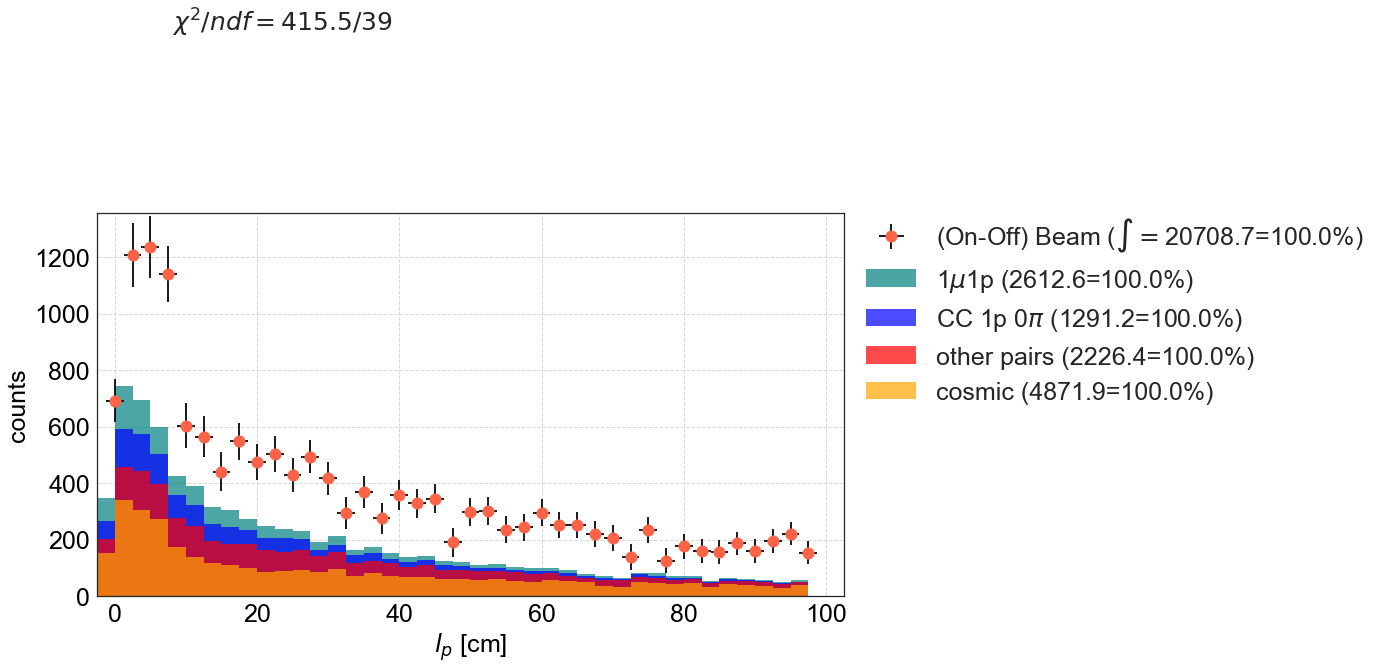

In [8]:
fig = plt.figure(figsize=(12,12))
bins=np.linspace(0,100,41)
var='l_assigned_proton'
x_label = r'$l_{p}$ [cm]'
# ax = fig.add_subplot(2,1,1)
# ax,leg=extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam['no cut'], OffBeamFV=OffBeamFV
#                       ,cosmic_overlay_sample = reduced_MCbnbDATAcosmicSamples['no cut']['cosmic']
#                       ,var=var , color='black' ,x_label=x_label, bins=bins , ax=ax, legend_loc='bbox')
ax = fig.add_subplot(2,1,2)
ax,leg=OnBeam_minus_OffBeam_1d(debug=0,MC_scaling=MC_scaling_DATAcosmic
                               ,OnBeamSample=reduced_OnBeam['no cut'] ,OriginalOnBeamSample=reduced_OnBeam['no cut']
                               ,OffBeamSample=reduced_OffBeam['no cut']  ,OriginalOffBeamSample=reduced_OffBeam['no cut']
                               ,MCsamples=reduced_MCbnbDATAcosmicSamples['no cut'], MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                               ,var=var , x_label=x_label ,bins=bins  , ax=ax, legend_loc='bbox'
                               ,do_add_chi2_MC_data=True , chi2_xy=(8,2000))
# plt.tight_layout()
plt.savefig(figures_path+'distance_before_cuts'+'.pdf', bbox_inches='tight')

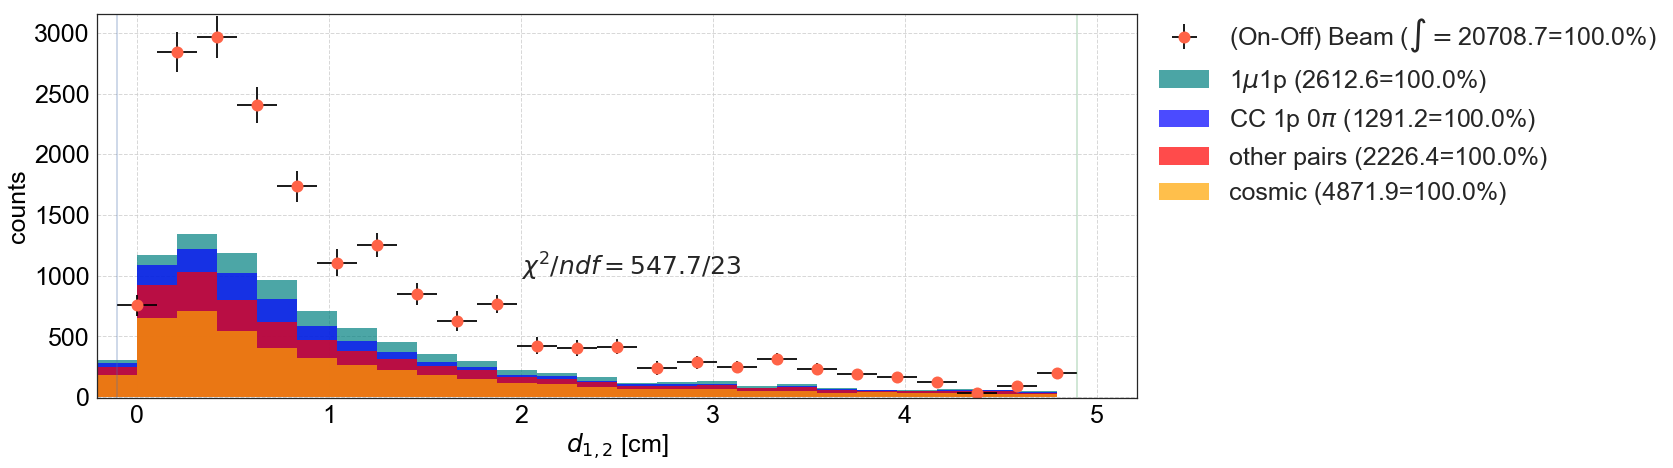

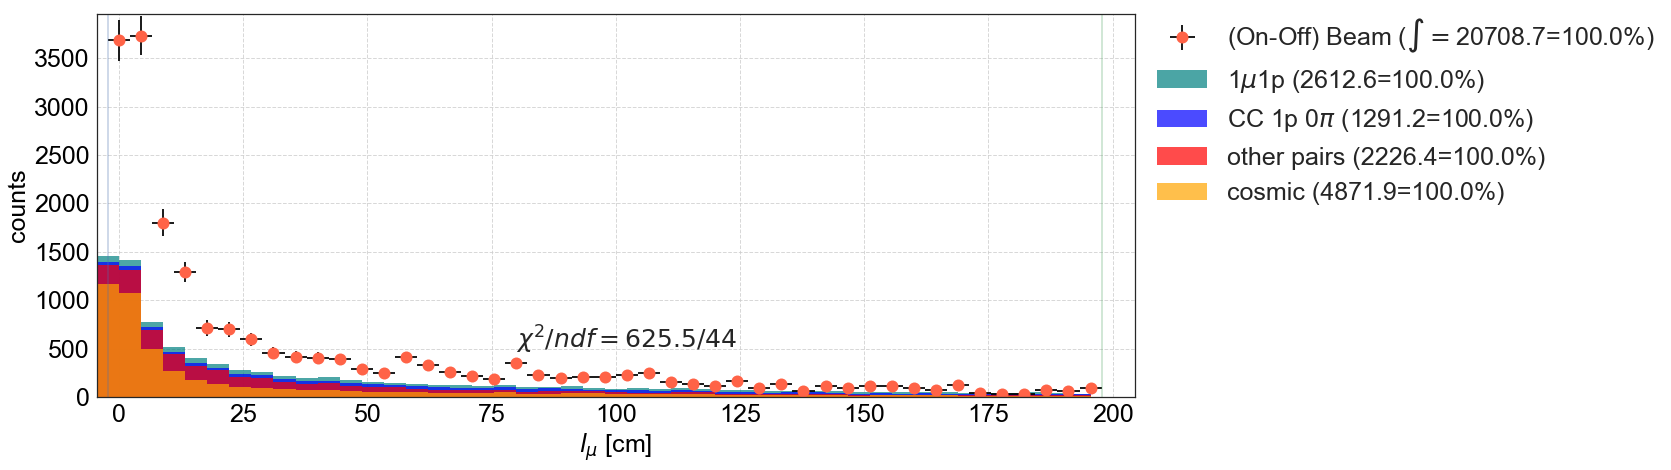

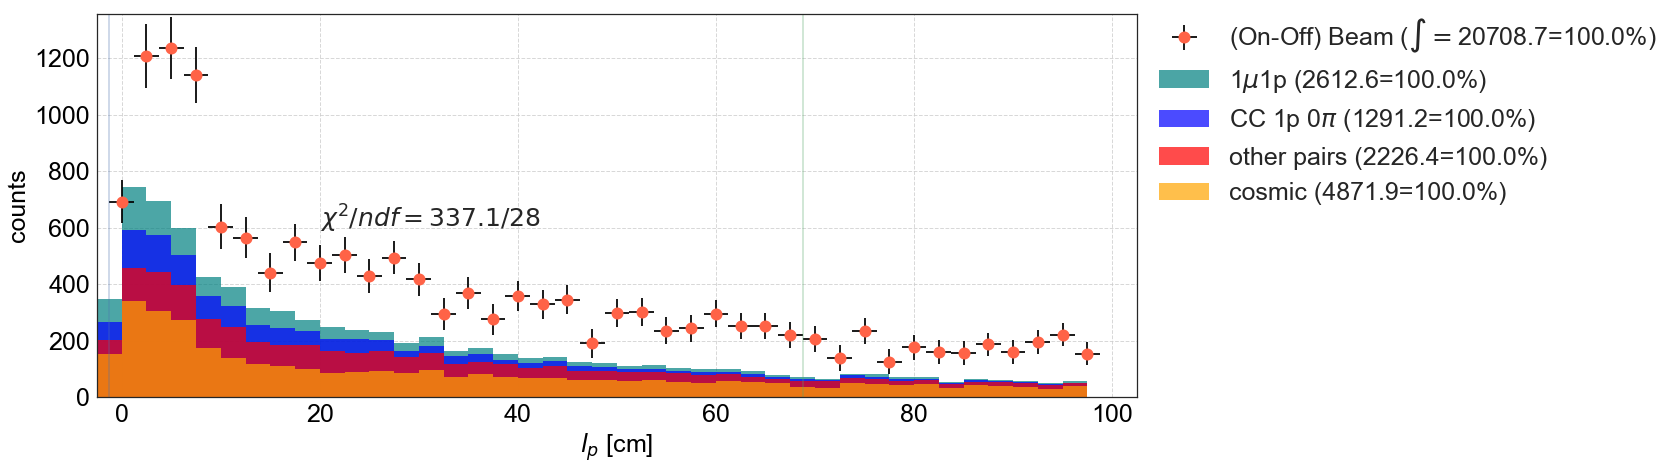

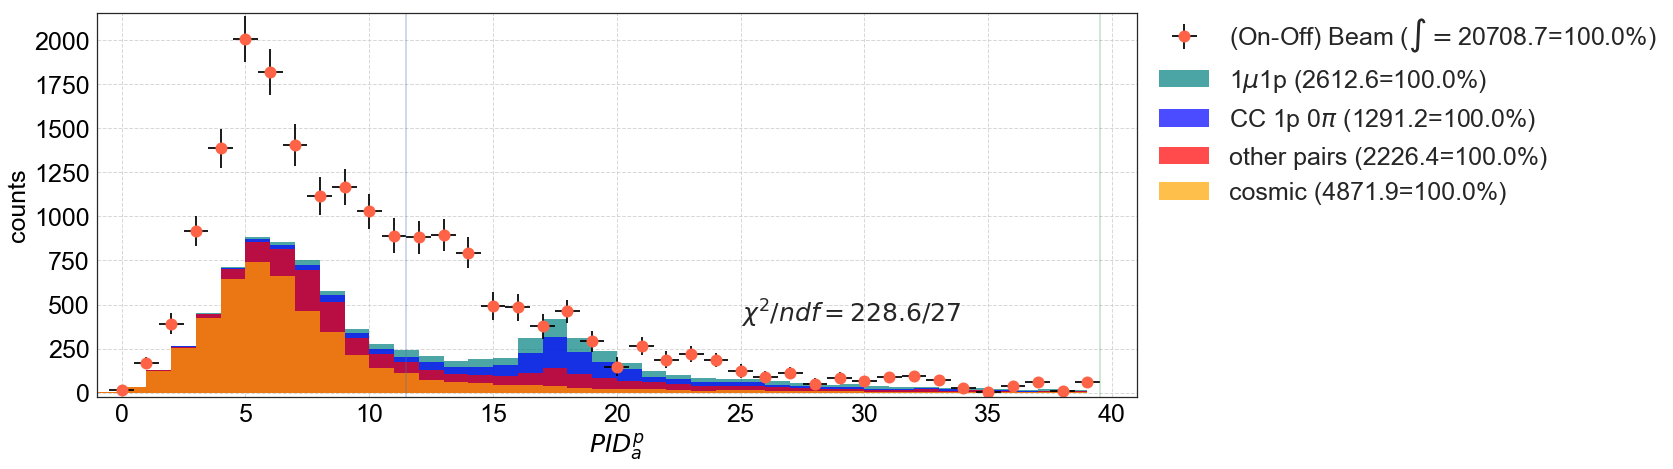

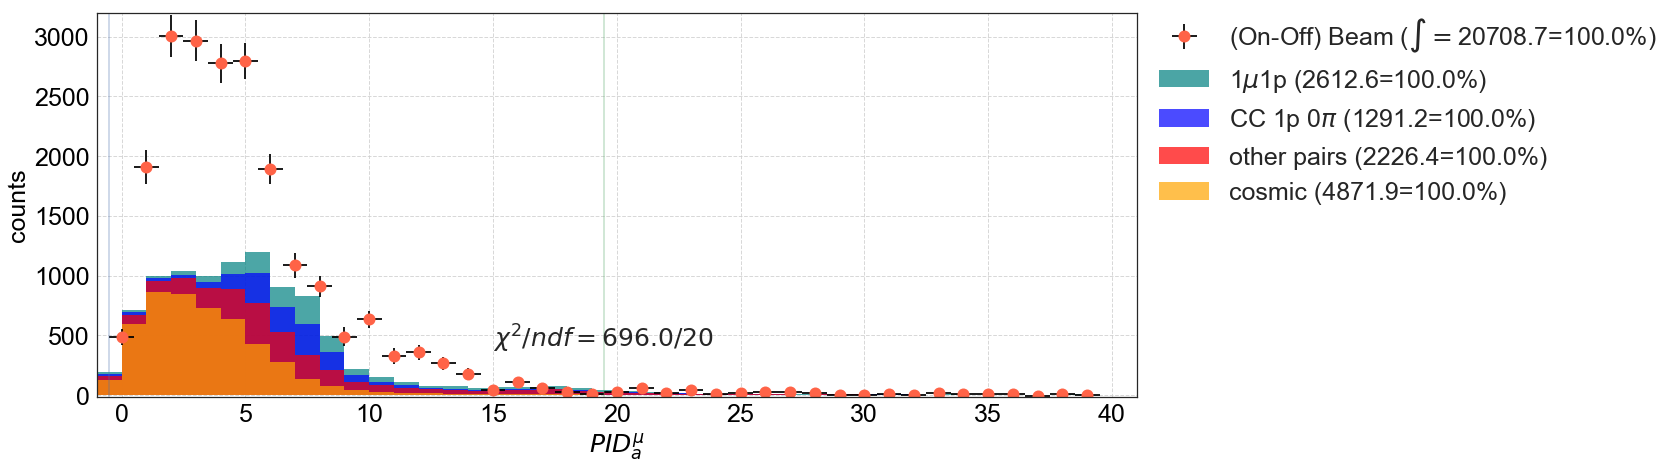

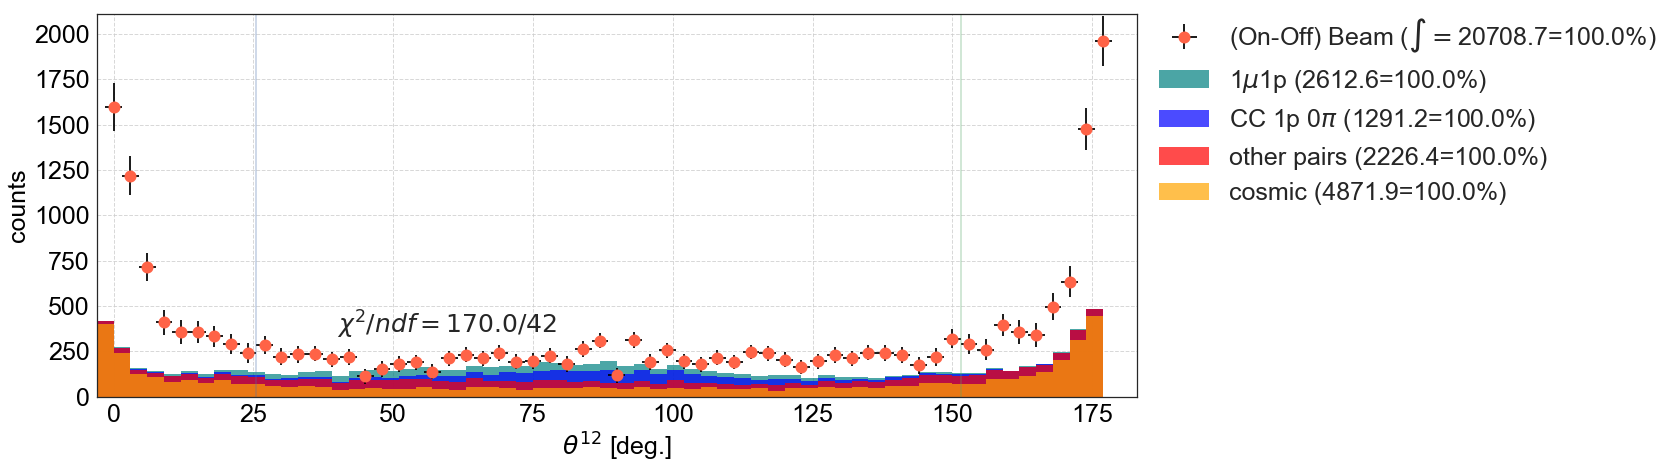

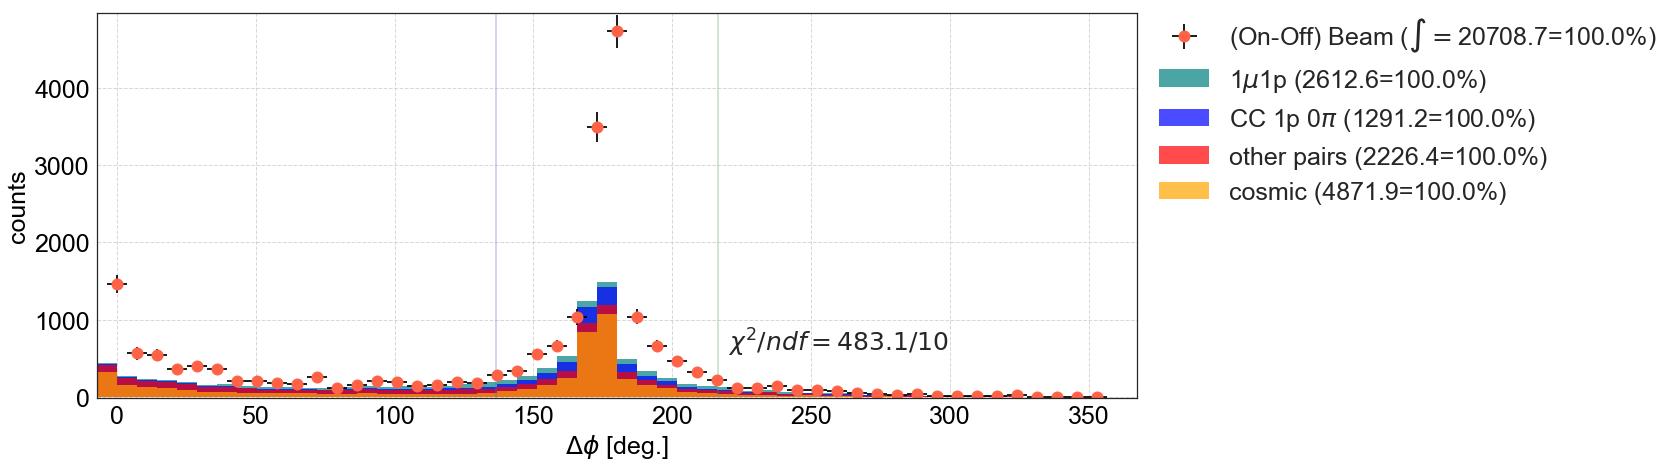

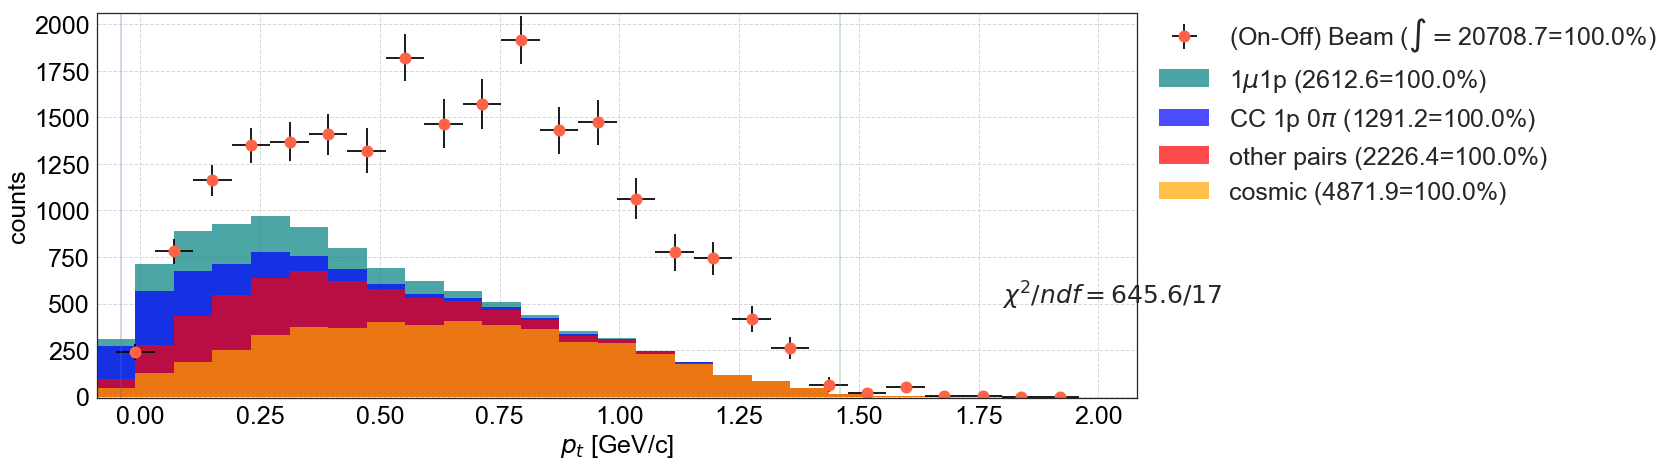

In [12]:
observables = ['distance','l_assigned_muon','l_assigned_proton','PIDa_assigned_proton','PIDa_assigned_muon','theta_12','delta_phi','reco_Pt']
x_labels = ['$d_{1,2}$ [cm]',r'$l_{\mu}$ [cm]',r'$l_{p}$ [cm]',r'$PID_a^{p}$',r'$PID_a^{\mu}$',r'$\theta^{12}$ [deg.]',r'$\Delta \phi$ [deg.]','$p_{t}$ [GeV/c]']
x_bins = [np.linspace(0,5,25),np.linspace(0,200,46),np.linspace(0,100,41),np.linspace(0,40,41),np.linspace(0,40,41),np.linspace(0,180,61),np.linspace(0,360,51),np.linspace(-0.01,2,26)]
chi2_xranges = [(0,5),(0,200),(0,70),(12,40),(0,20),(27,153),(140,220),(0,1.5)]
chi2_xy_text = [(2,1000),(80,500),(20,600),(25,400),(15,400),(40,350),(220,600),(1.8,500)]

for var,x_label,bins,chi2_xrange,chi2_xy in zip(observables,x_labels,x_bins,chi2_xranges,chi2_xy_text):
    
    fig = plt.figure(figsize=(16,12))

#     ax = fig.add_subplot(2,1,1)
#     ax,leg=extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam['no cut']                                 
#                                  ,OffBeamFV=OffBeamFV,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
#                                  ,cosmic_overlay_sample = reduced_MCbnbDATAcosmicSamples['no cut']['cosmic']
#                                  ,var=var , color='black' ,x_label=x_label, bins=bins , ax=ax, legend_loc='bbox')
    
    ax = fig.add_subplot(2,1,2)
    ax,leg=OnBeam_minus_OffBeam_1d(MC_scaling=MC_scaling_DATAcosmic
                               ,OnBeamSample=reduced_OnBeam['no cut'] ,OriginalOnBeamSample=reduced_OnBeam['no cut']
                               ,OffBeamSample=reduced_OffBeam['no cut']  ,OriginalOffBeamSample=reduced_OffBeam['no cut']
                               ,MCsamples=reduced_MCbnbDATAcosmicSamples['no cut'], MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                               ,var=var , x_label=x_label ,bins=bins  , ax=ax, legend_loc='bbox'
                               ,do_add_chi2_MC_data=True , chi2_xrange=chi2_xrange, chi2_xy=chi2_xy)

    plt.savefig(figures_path+var+'_'+'before_cuts.pdf', bbox_inches='tight') 

# After application of cuts

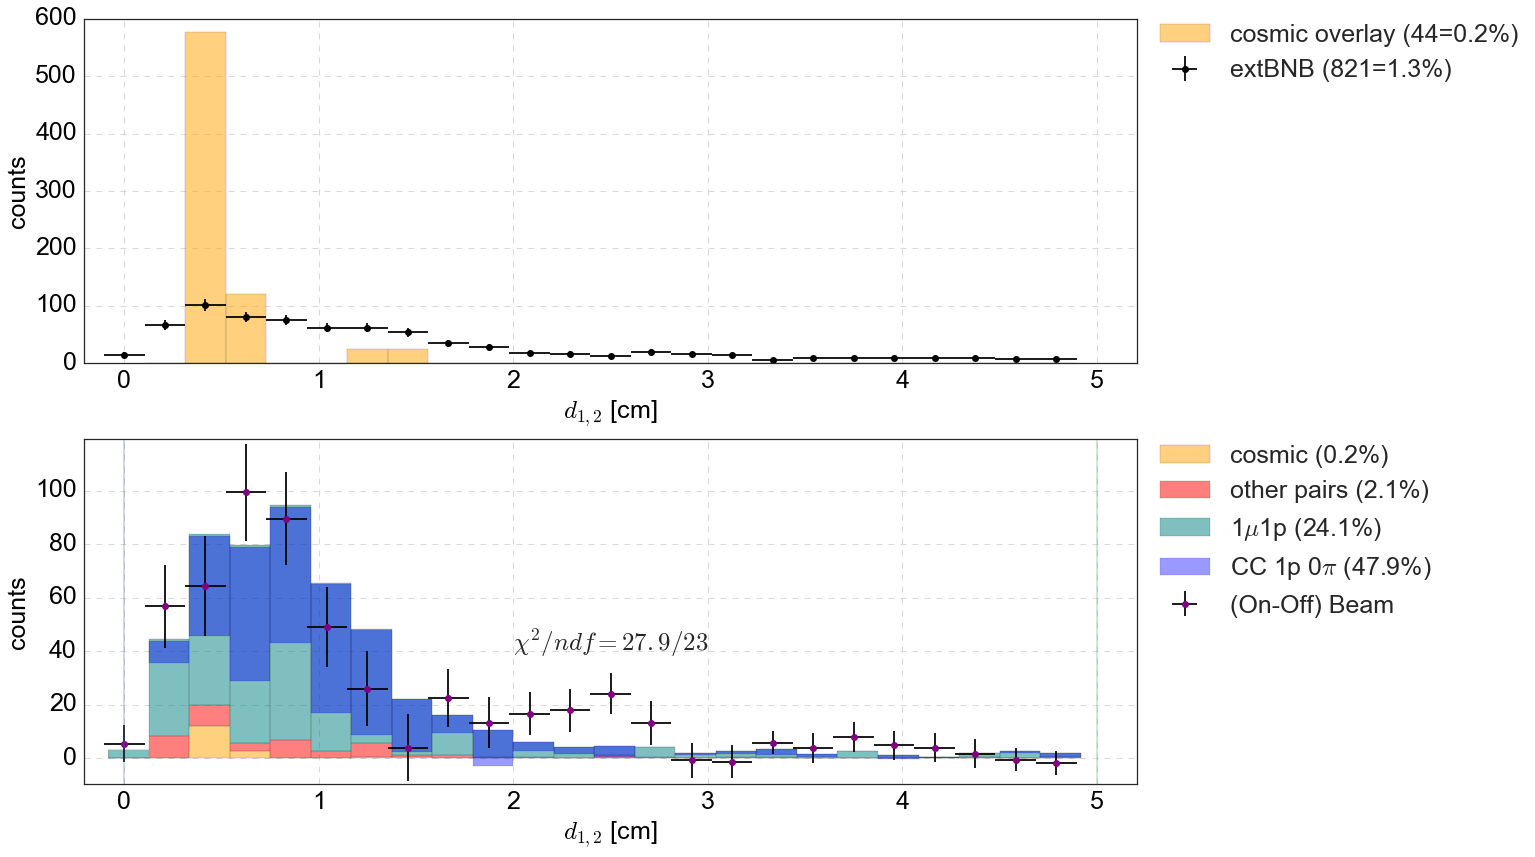

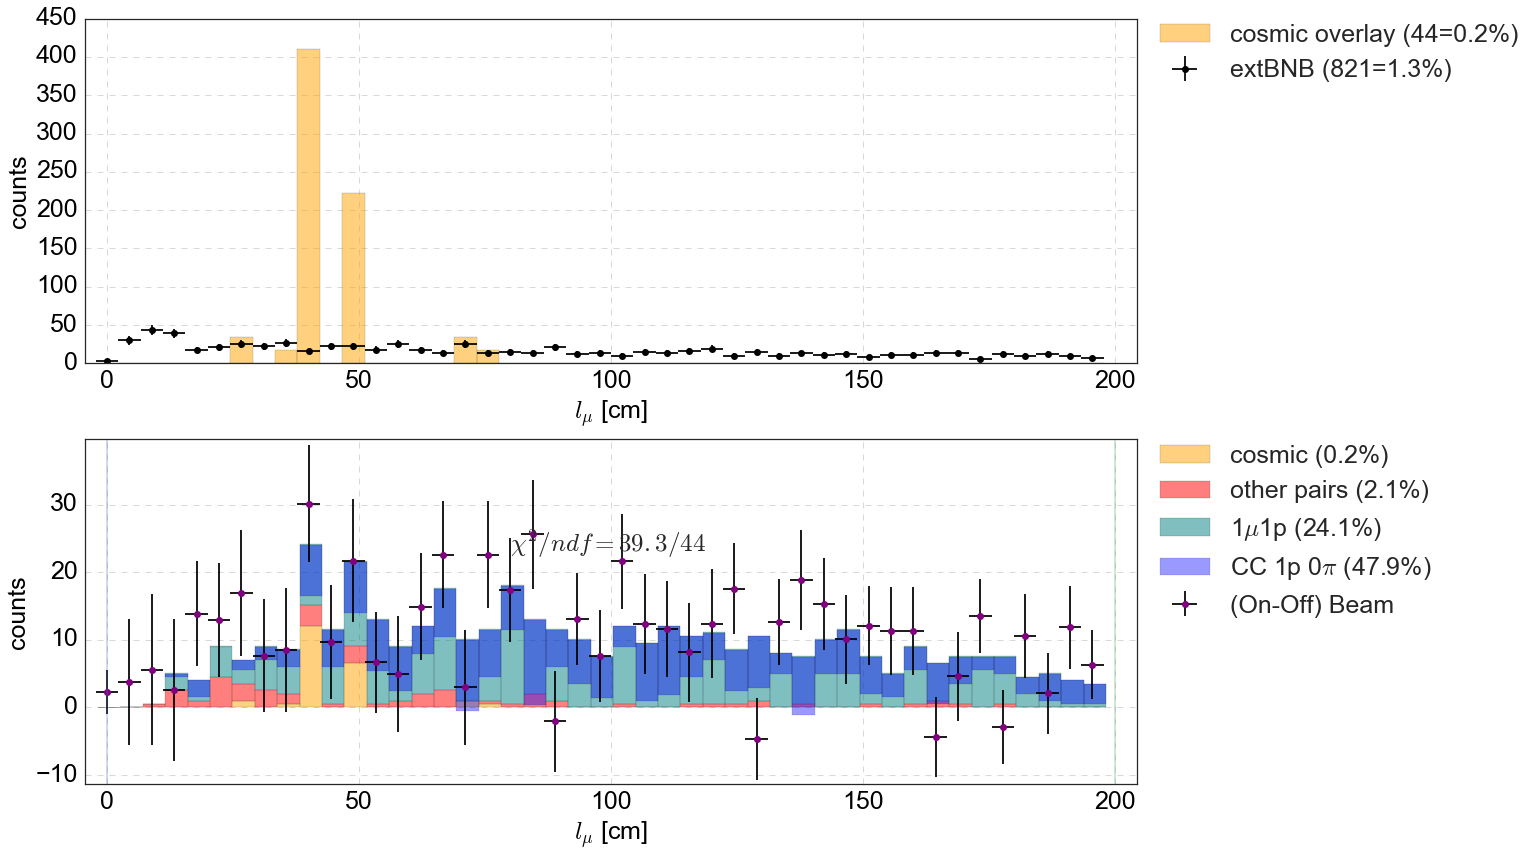

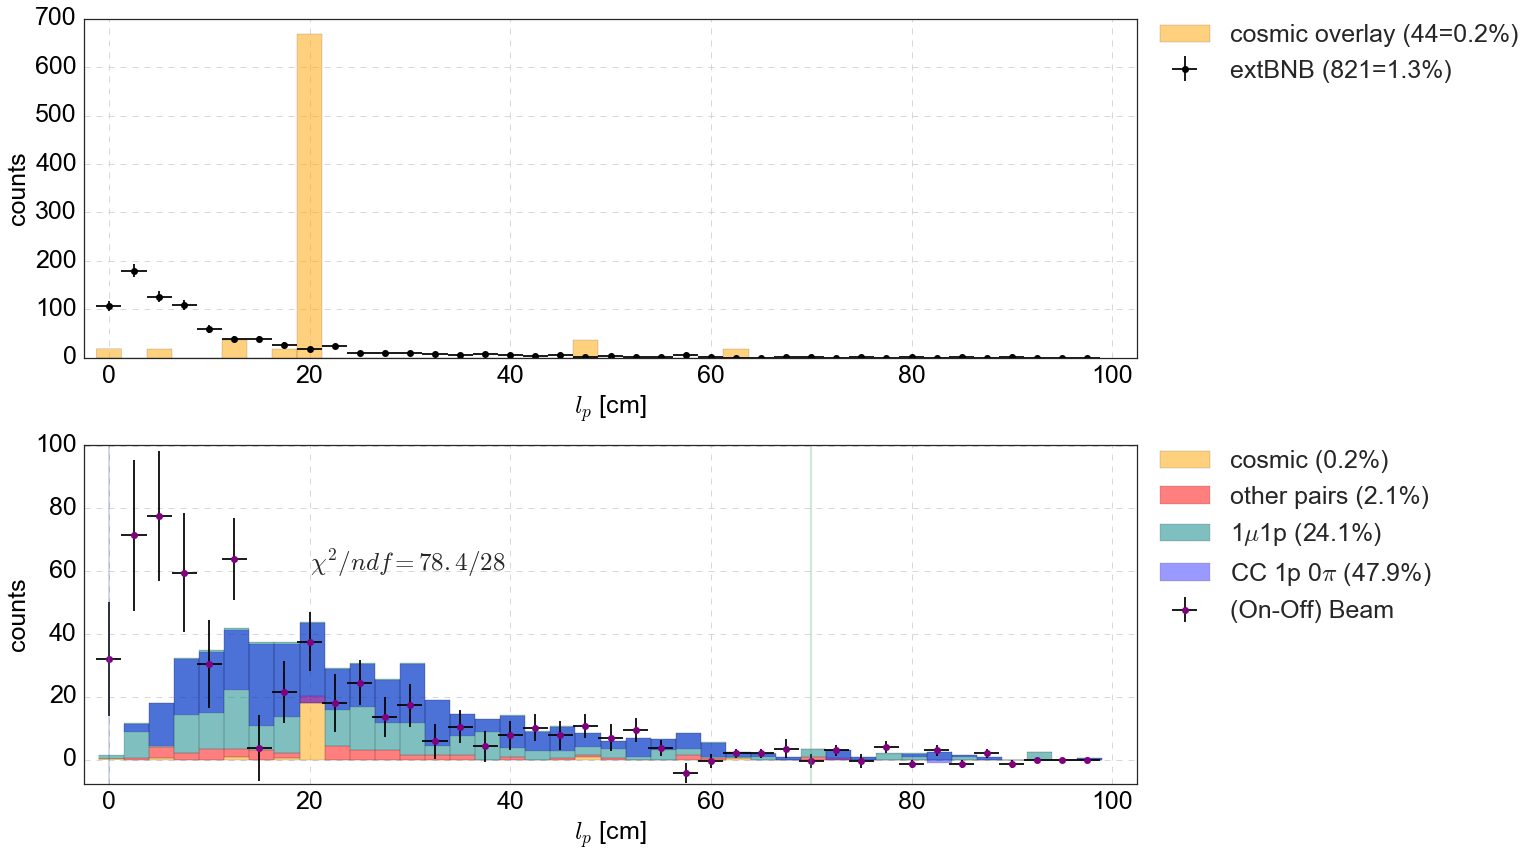

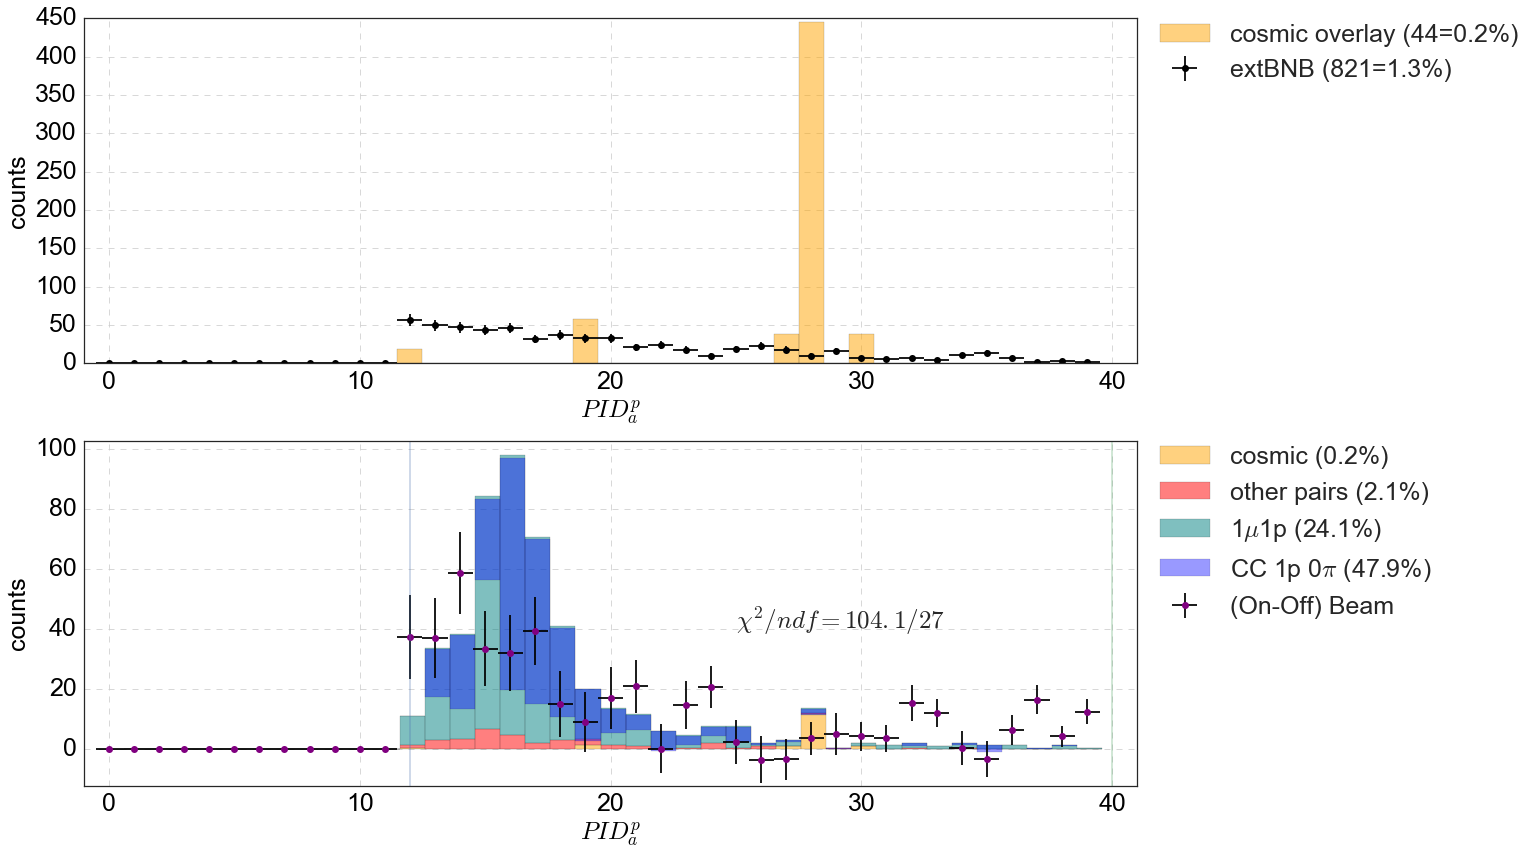

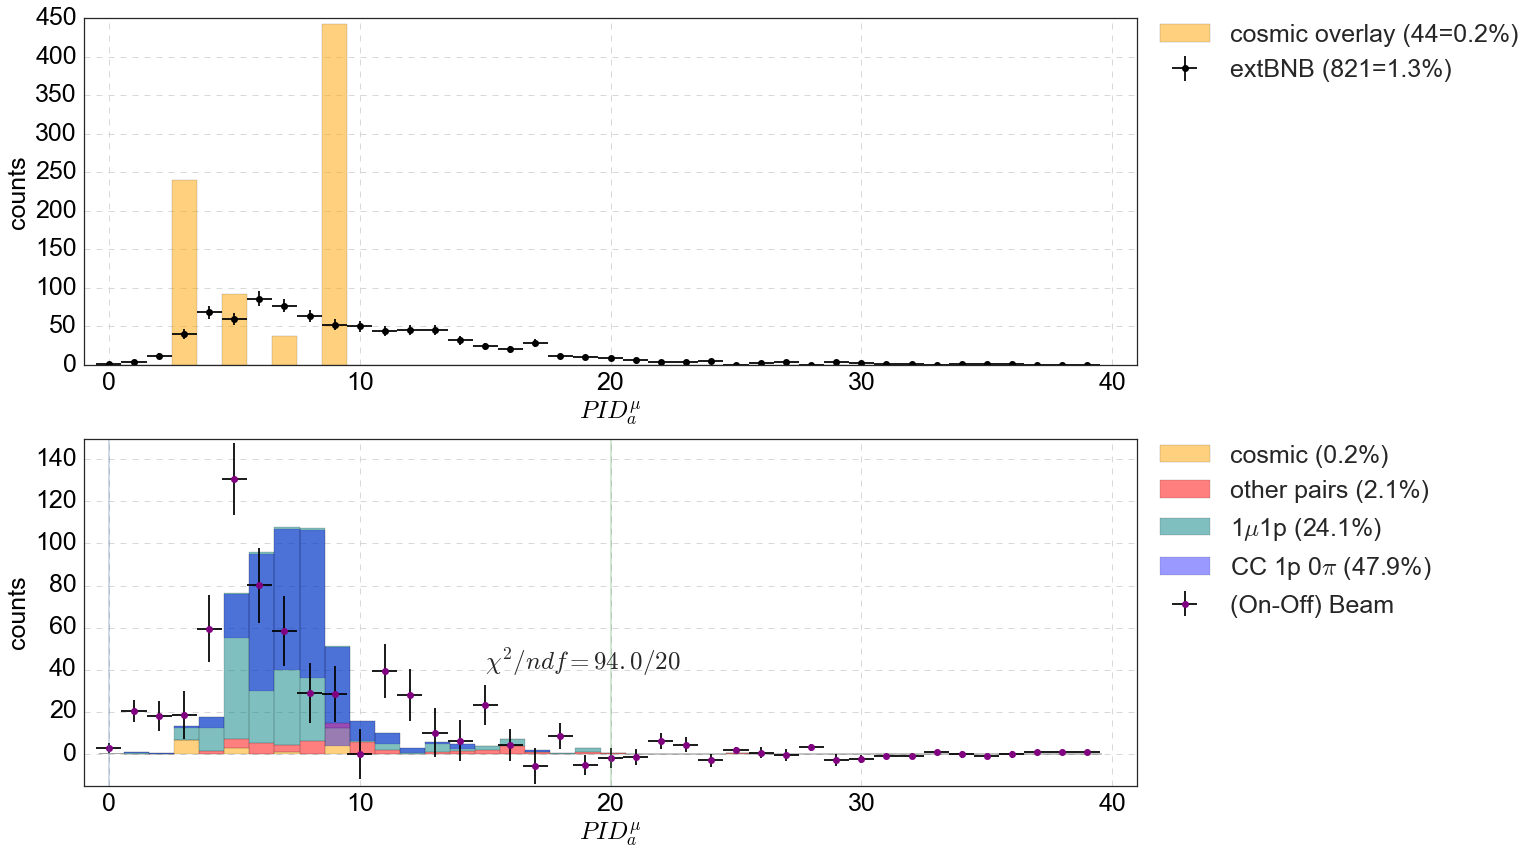

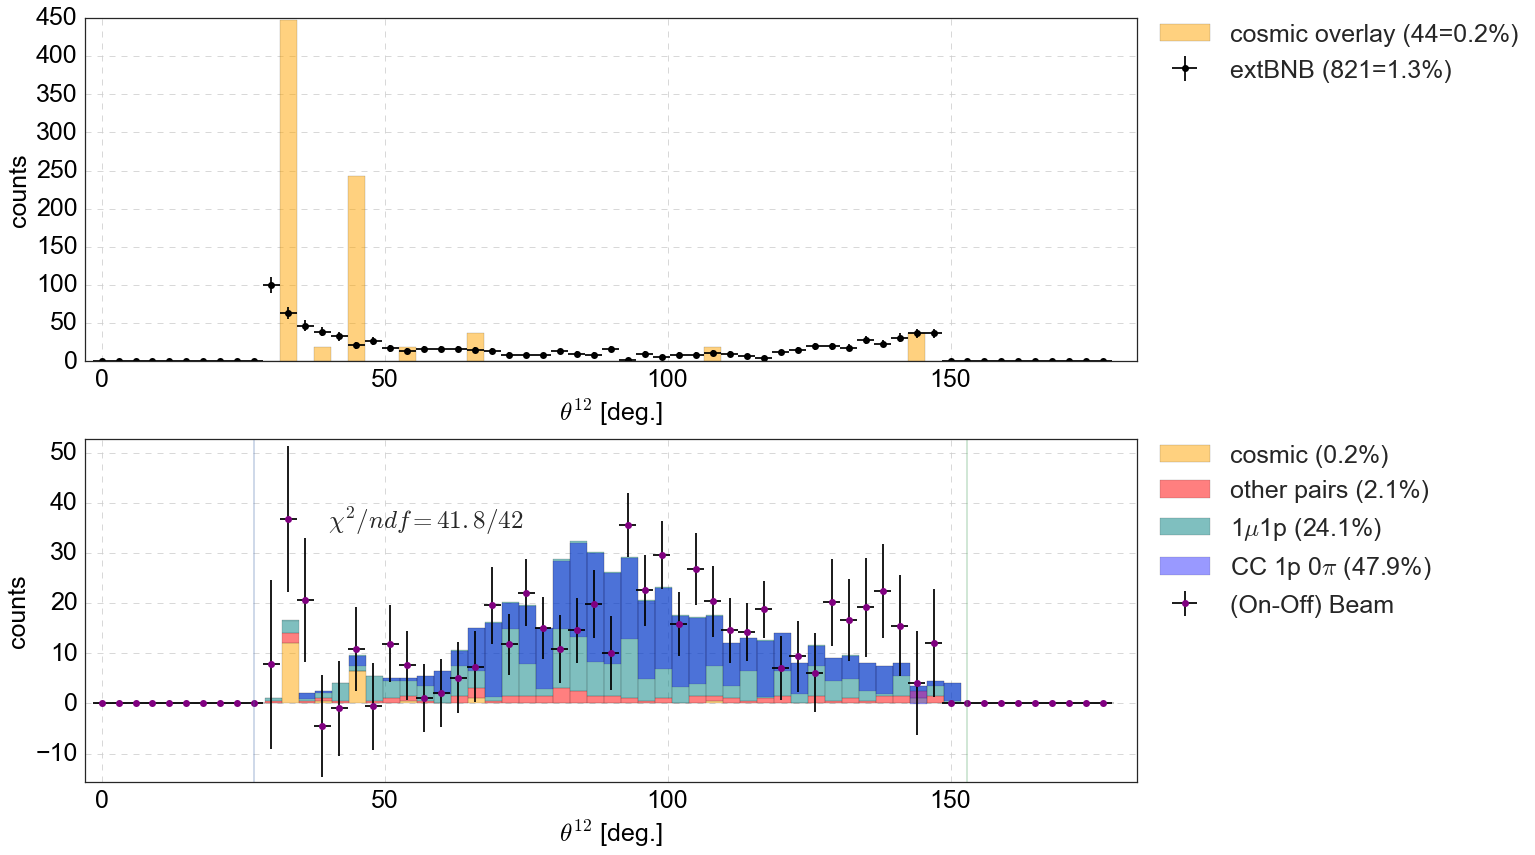

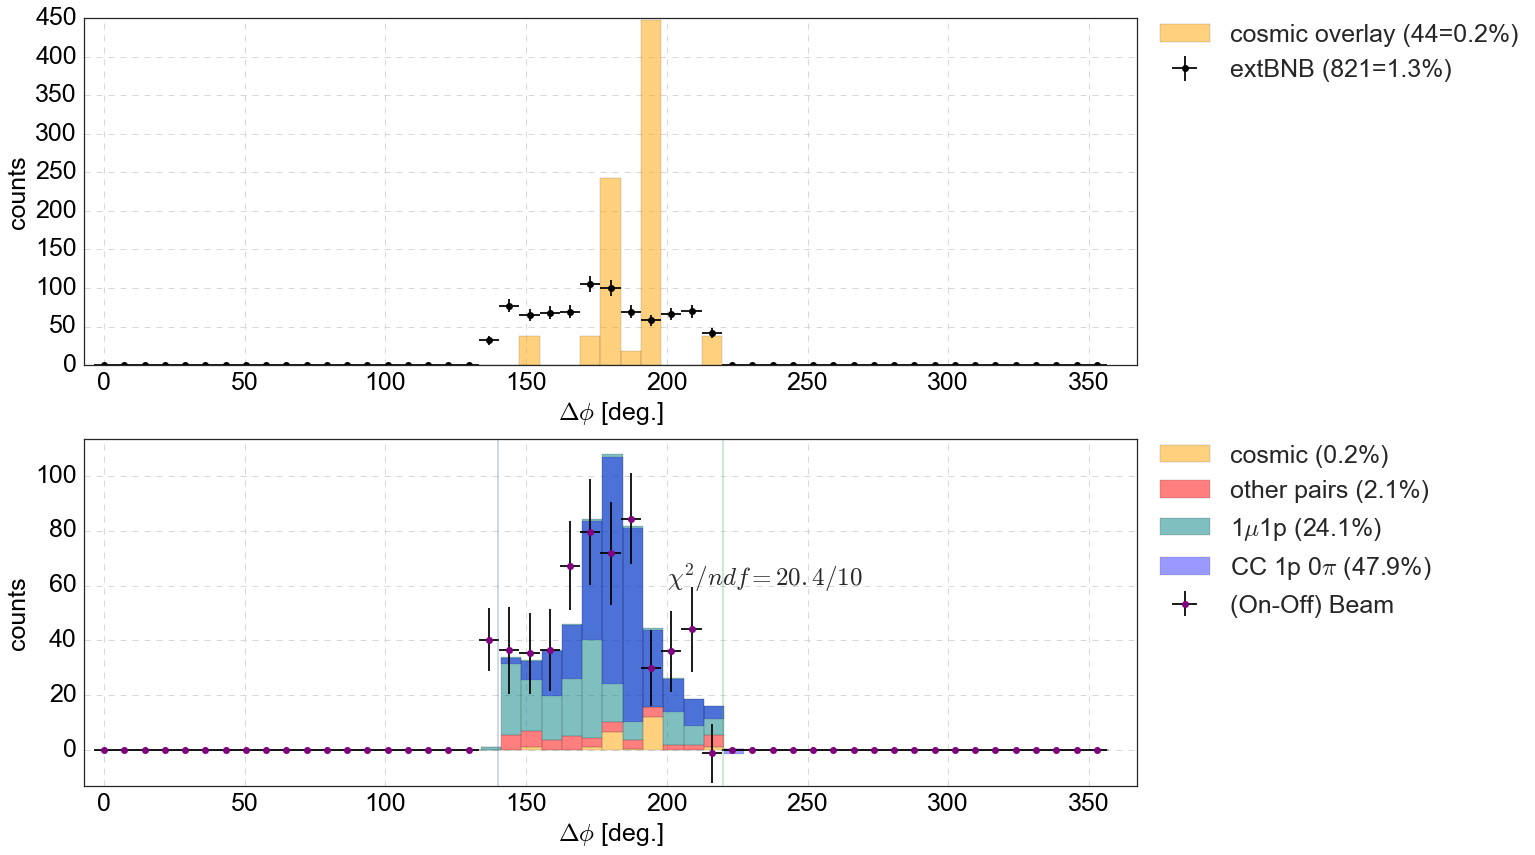

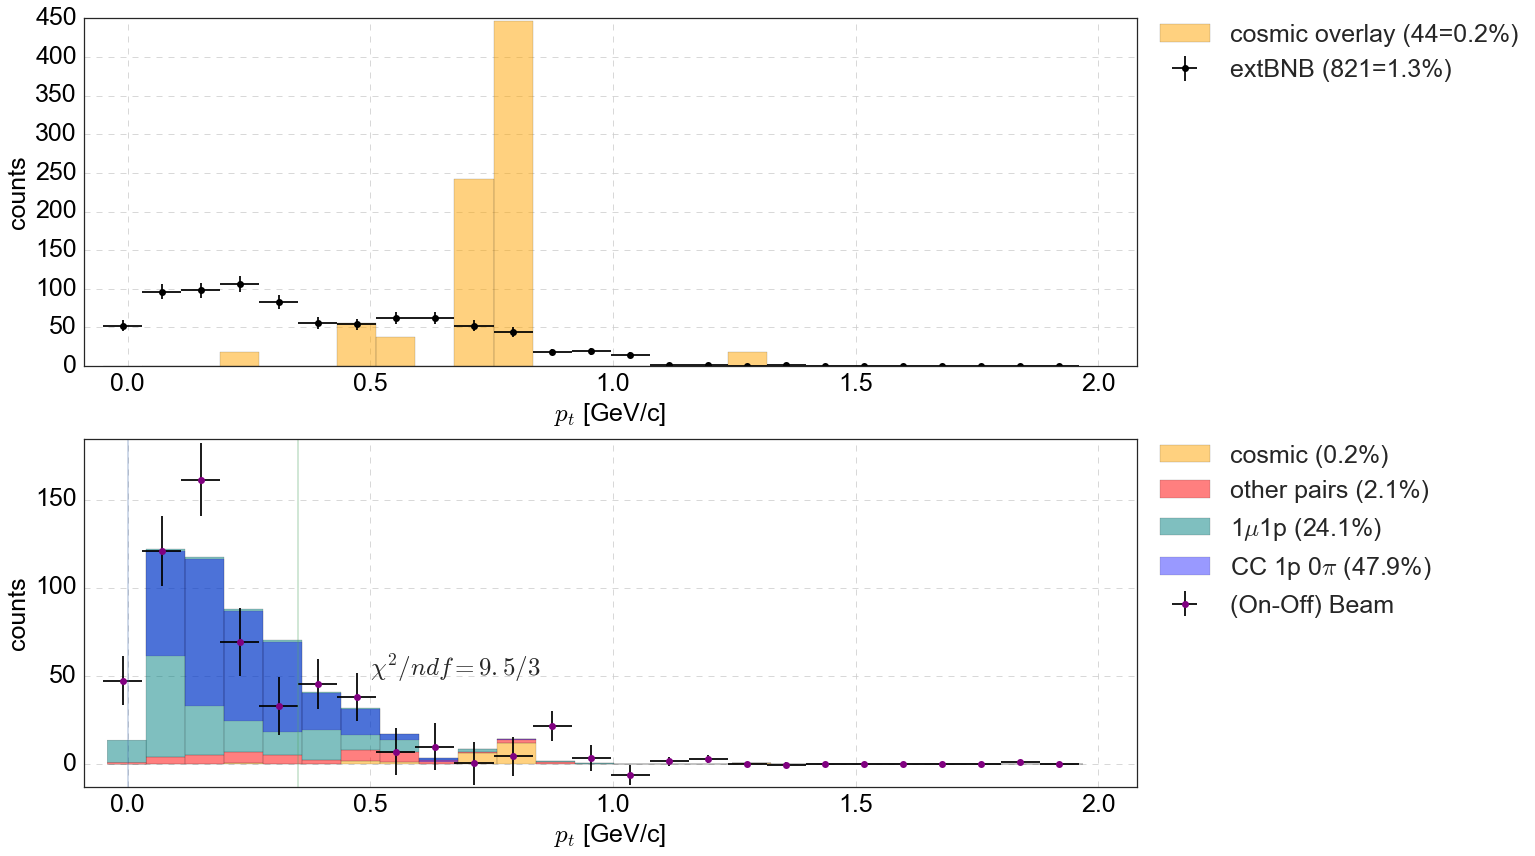

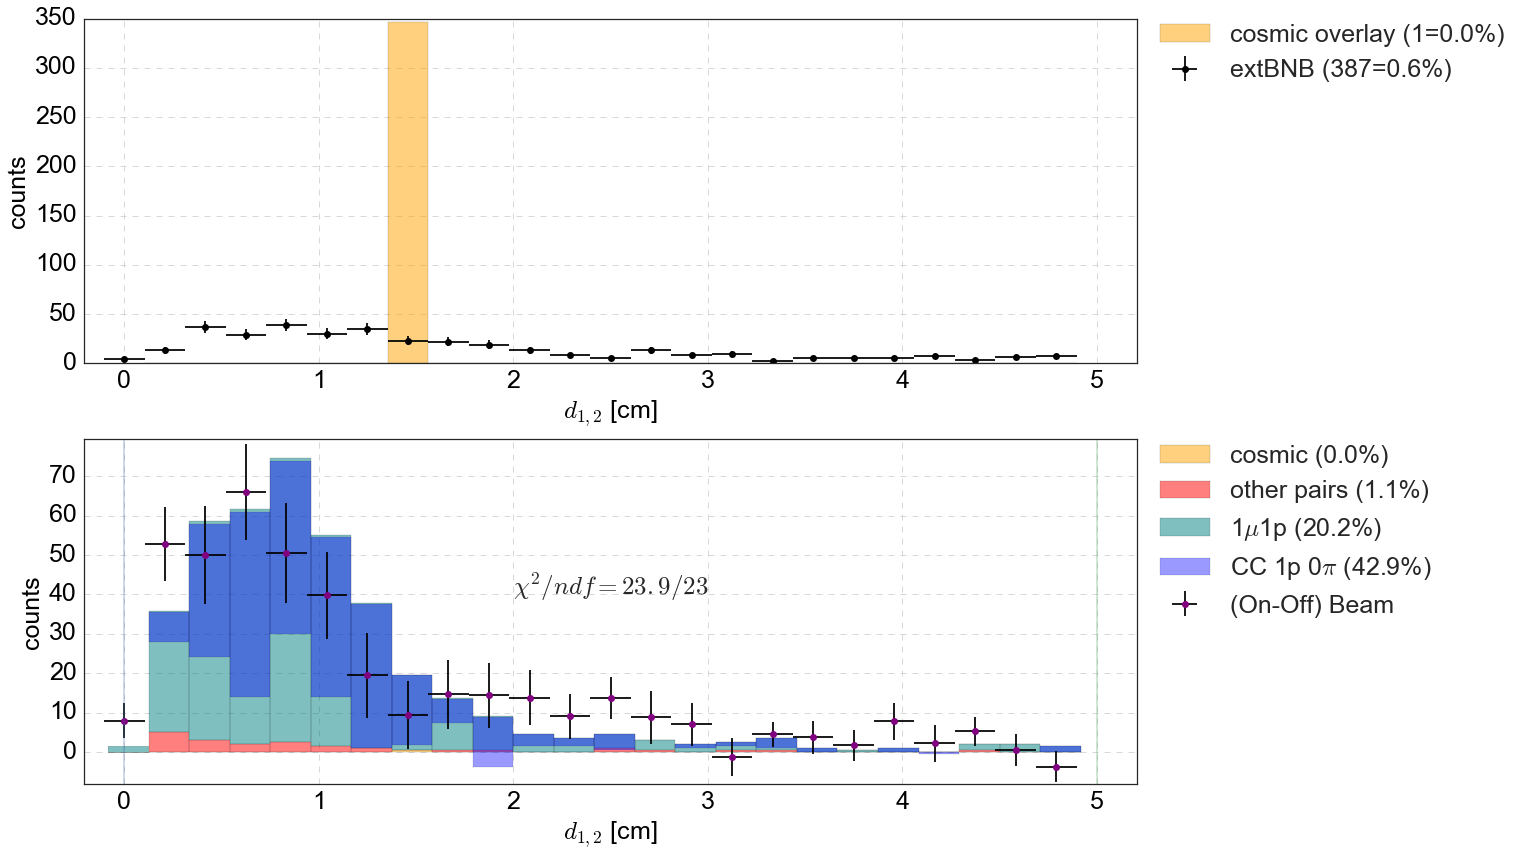

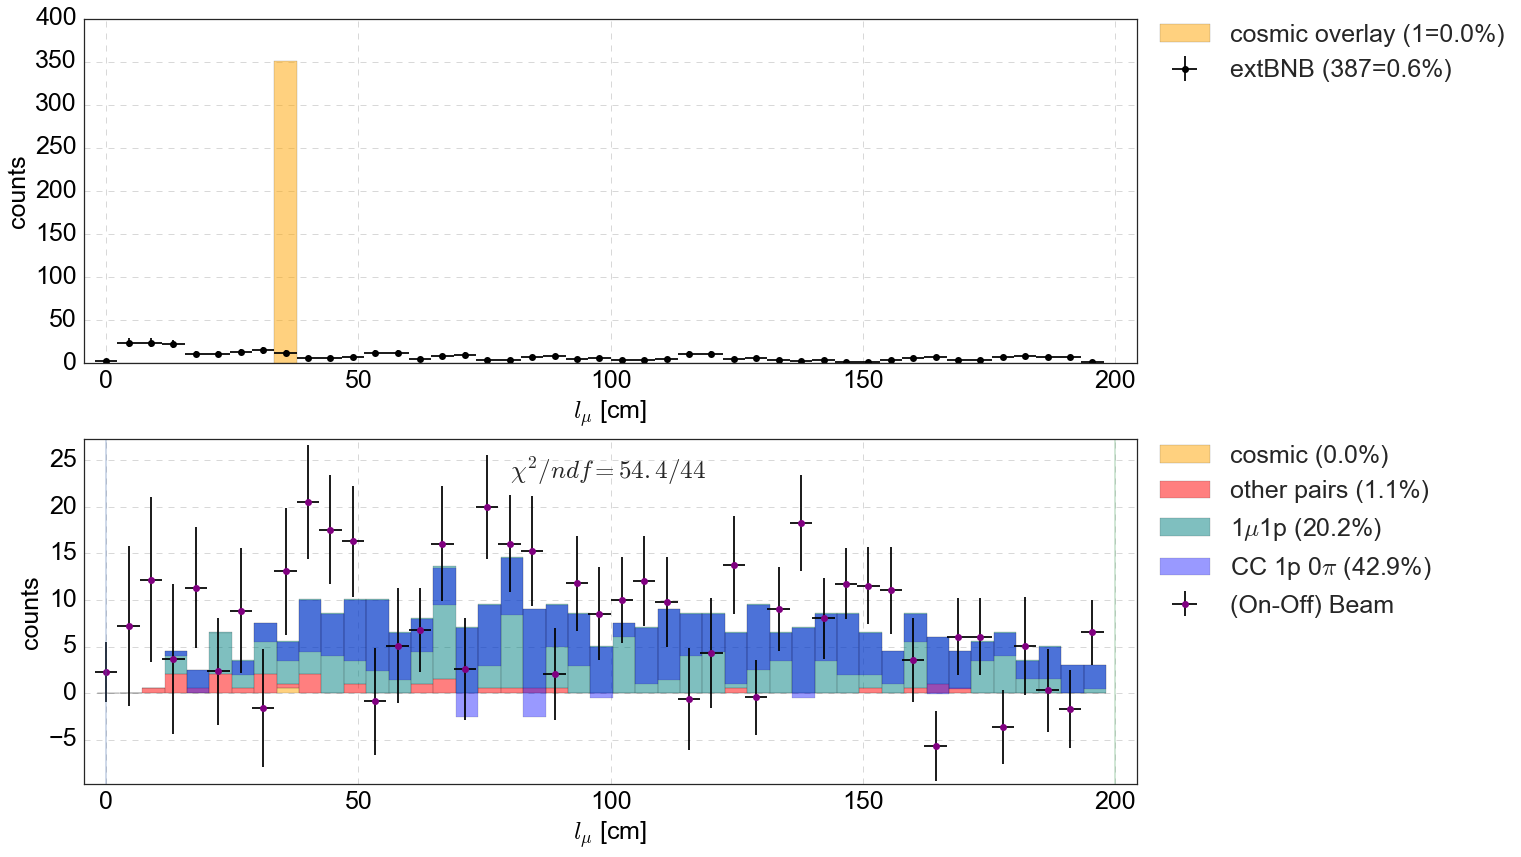

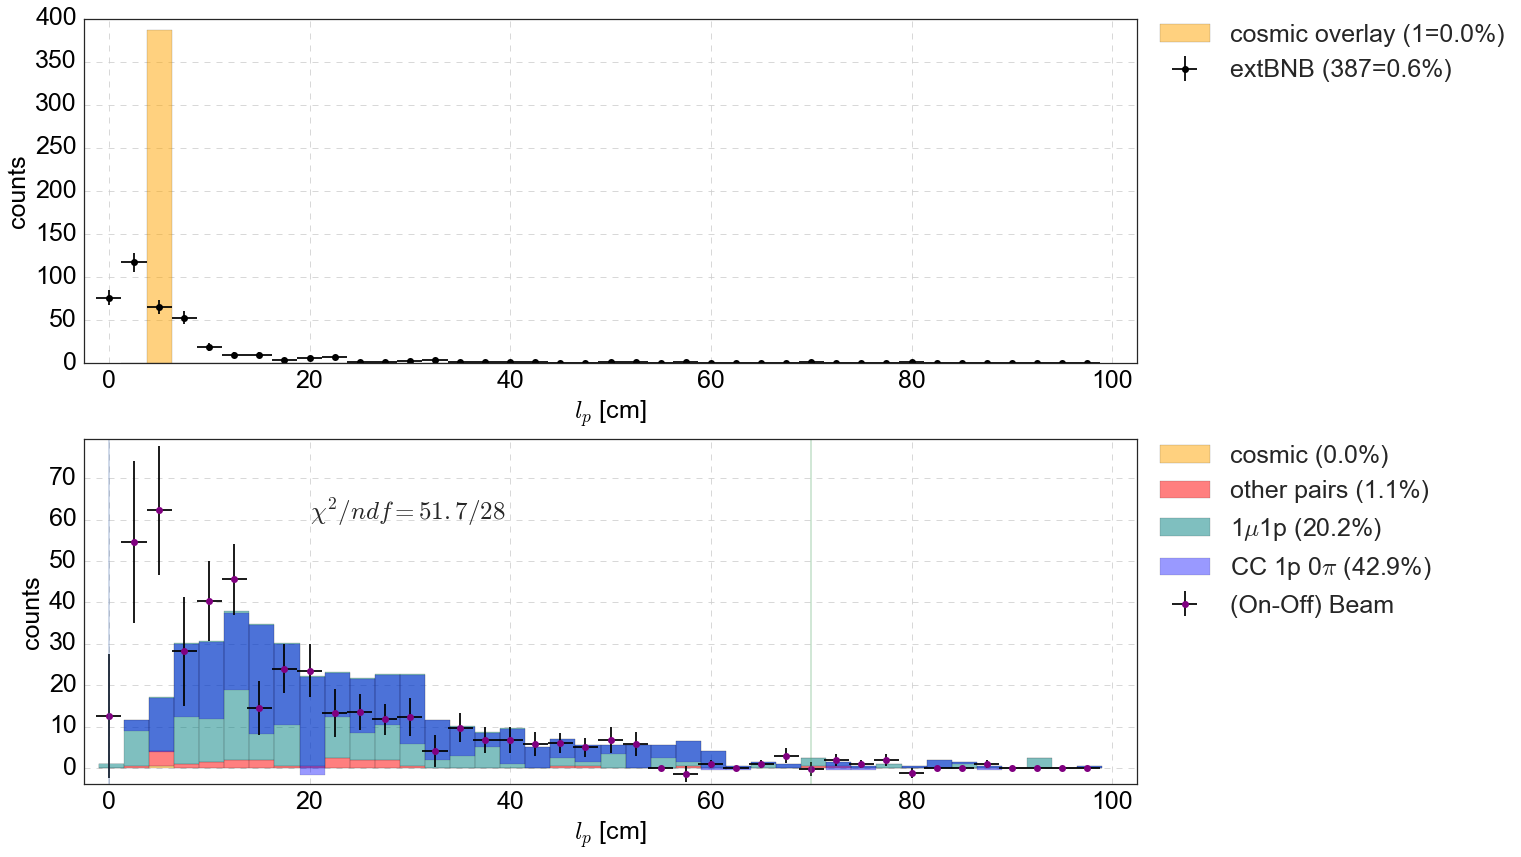

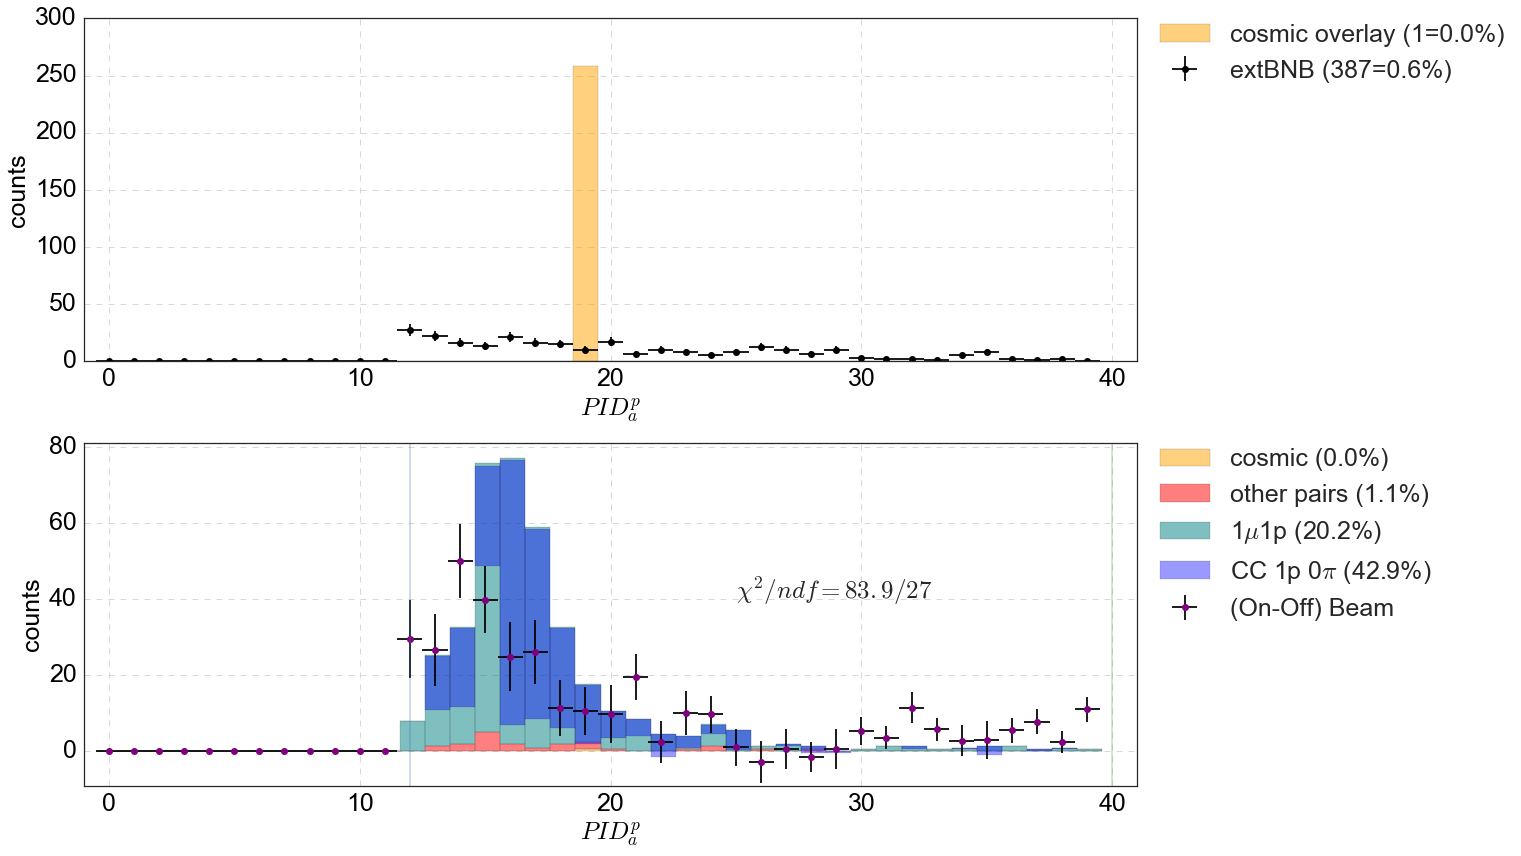

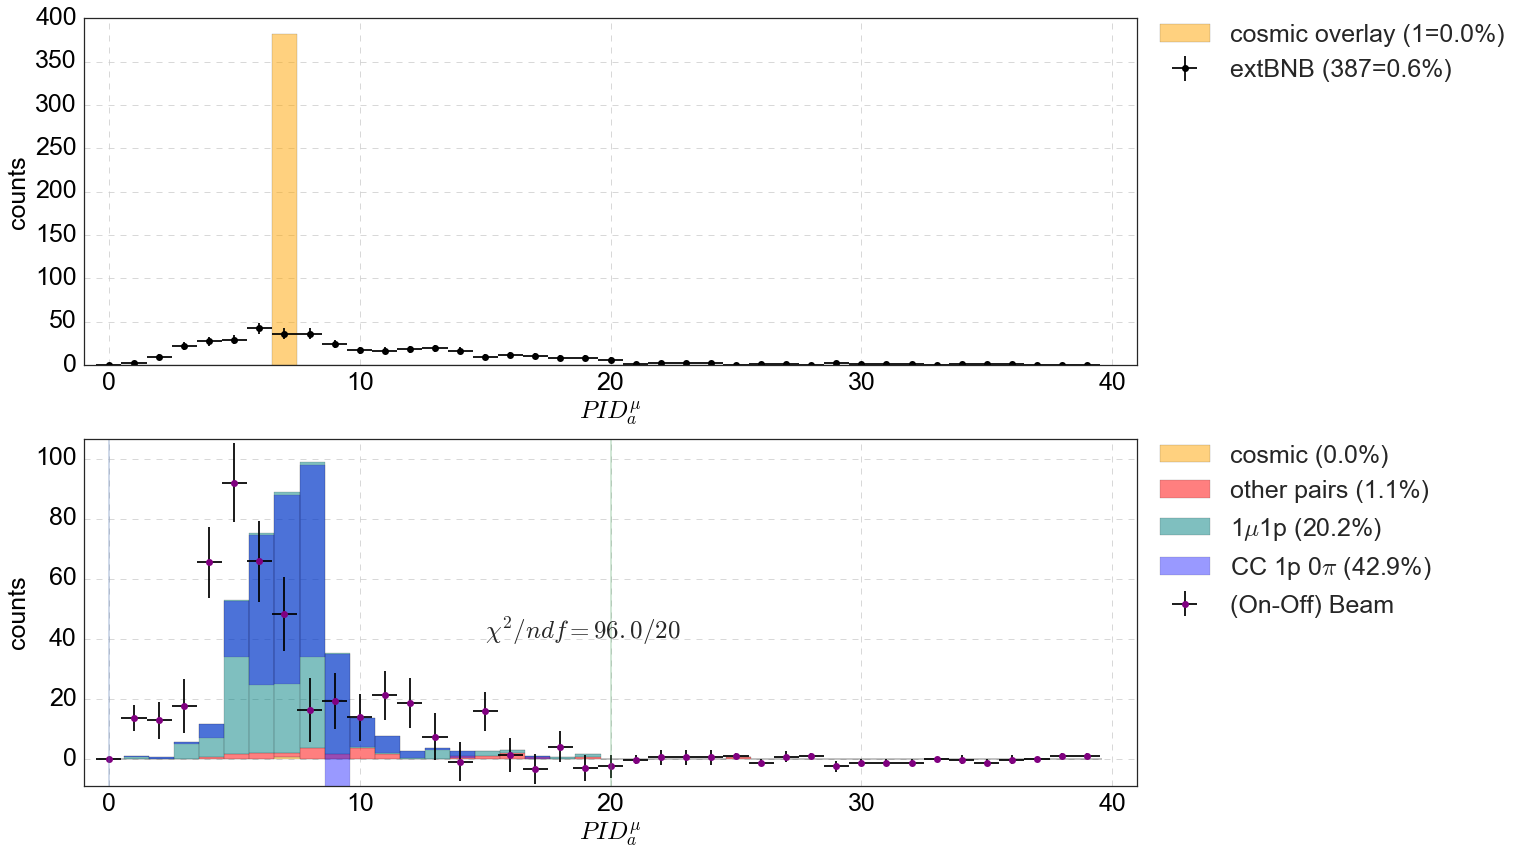

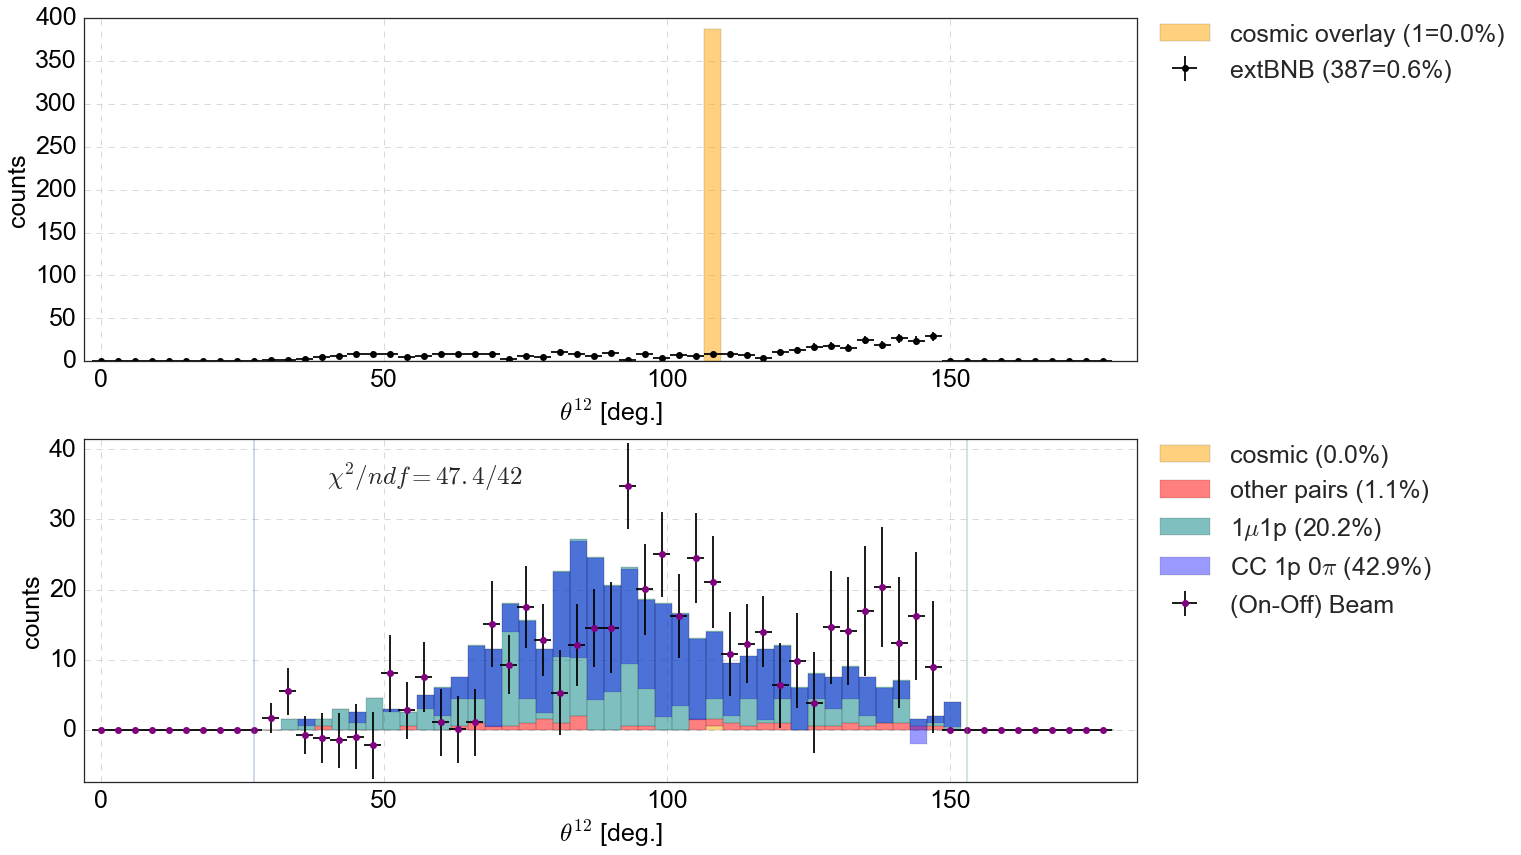

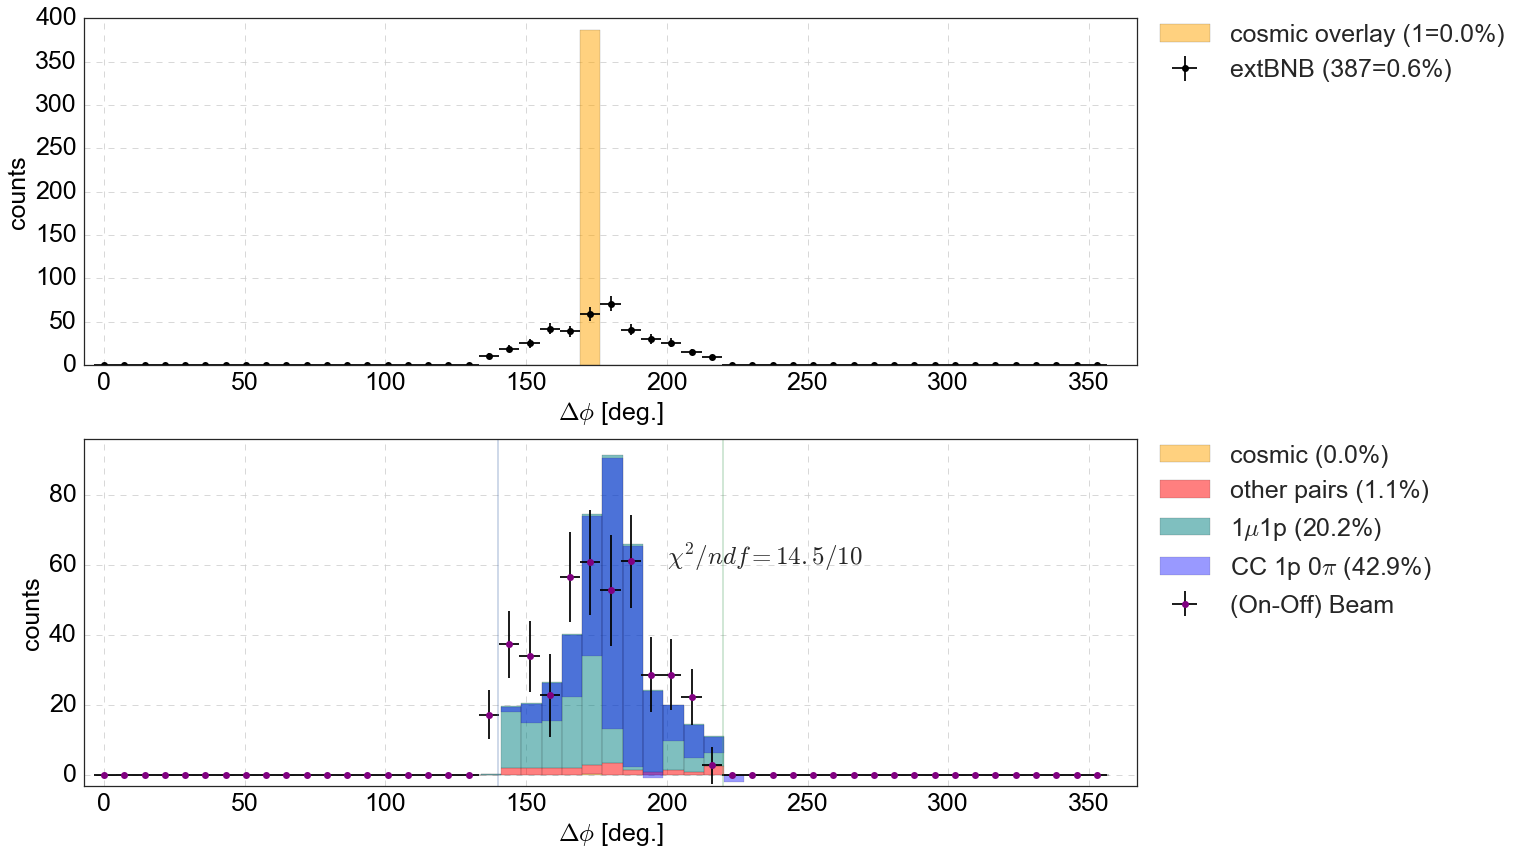

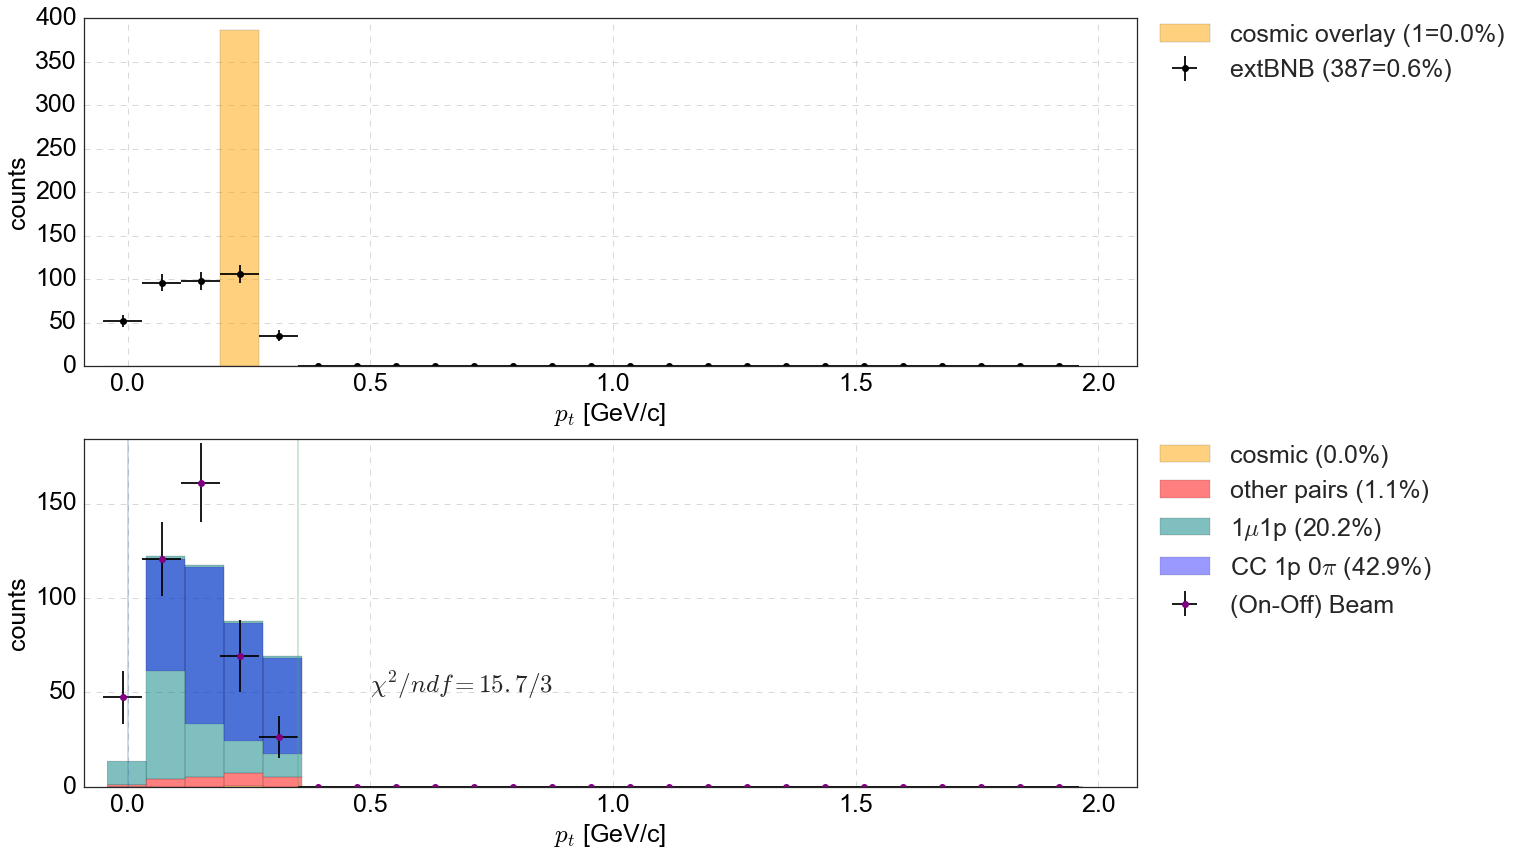

In [15]:
observables = ['distance','l_assigned_muon','l_assigned_proton','PIDa_assigned_proton','PIDa_assigned_muon','theta_12','delta_phi','reco_Pt']
x_labels = ['$d_{1,2}$ [cm]',r'$l_{\mu}$ [cm]',r'$l_{p}$ [cm]',r'$PID_a^{p}$',r'$PID_a^{\mu}$',r'$\theta^{12}$ [deg.]',r'$\Delta \phi$ [deg.]','$p_{t}$ [GeV/c]']
x_bins = [np.linspace(0,5,25),np.linspace(0,200,46),np.linspace(0,100,41),np.linspace(0,40,41),np.linspace(0,40,41),np.linspace(0,180,61),np.linspace(0,360,51),np.linspace(-0.01,2,26)]
chi2_xranges = [(0,5),(0,200),(0,70),(12,40),(0,20),(27,153),(140,220),(0,0.35)]
chi2_xy_text = [(2,40),(80,23),(20,60),(25,40),(15,40),(40,35),(200,60),(0.5,50)]

for cut_name in ['delta phi','soft Pt']: # 'PIDa','length','non-collinearity','vertex activity',
    for var,x_label,bins,chi2_xrange,chi2_xy in zip(observables,x_labels,x_bins,chi2_xranges,chi2_xy_text):
        fig = plt.figure(figsize=(16,12))

        ax = fig.add_subplot(2,1,1)
        ax,leg=extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam[cut_name]
                                     ,OffBeamFV=OffBeamFV,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                                     ,cosmic_overlay_sample = reduced_MCbnbDATAcosmicSamples[cut_name]['cosmic']
                                     ,var=var , color='black' ,x_label=x_label, bins=bins , ax=ax, legend_loc='bbox')

        ax = fig.add_subplot(2,1,2)
        ax,leg=OnBeam_minus_OffBeam_1d(OnBeamSample=reduced_OnBeam[cut_name] 
                            ,OffBeamSample=reduced_OffBeam[cut_name] 
                            ,MCsamples=reduced_MCbnbDATAcosmicSamples[cut_name], MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                            ,var=var , x_label=x_label ,bins=bins  , ax=ax, legend_loc='bbox'
                                       ,do_add_chi2_MC_data=True , chi2_xrange=chi2_xrange, chi2_xy=chi2_xy)

        plt.savefig(figures_path+var+'_'+'after_cut_'+cut_name+'.pdf', bbox_inches='tight')

# What aboue $Q^2$ dependce?

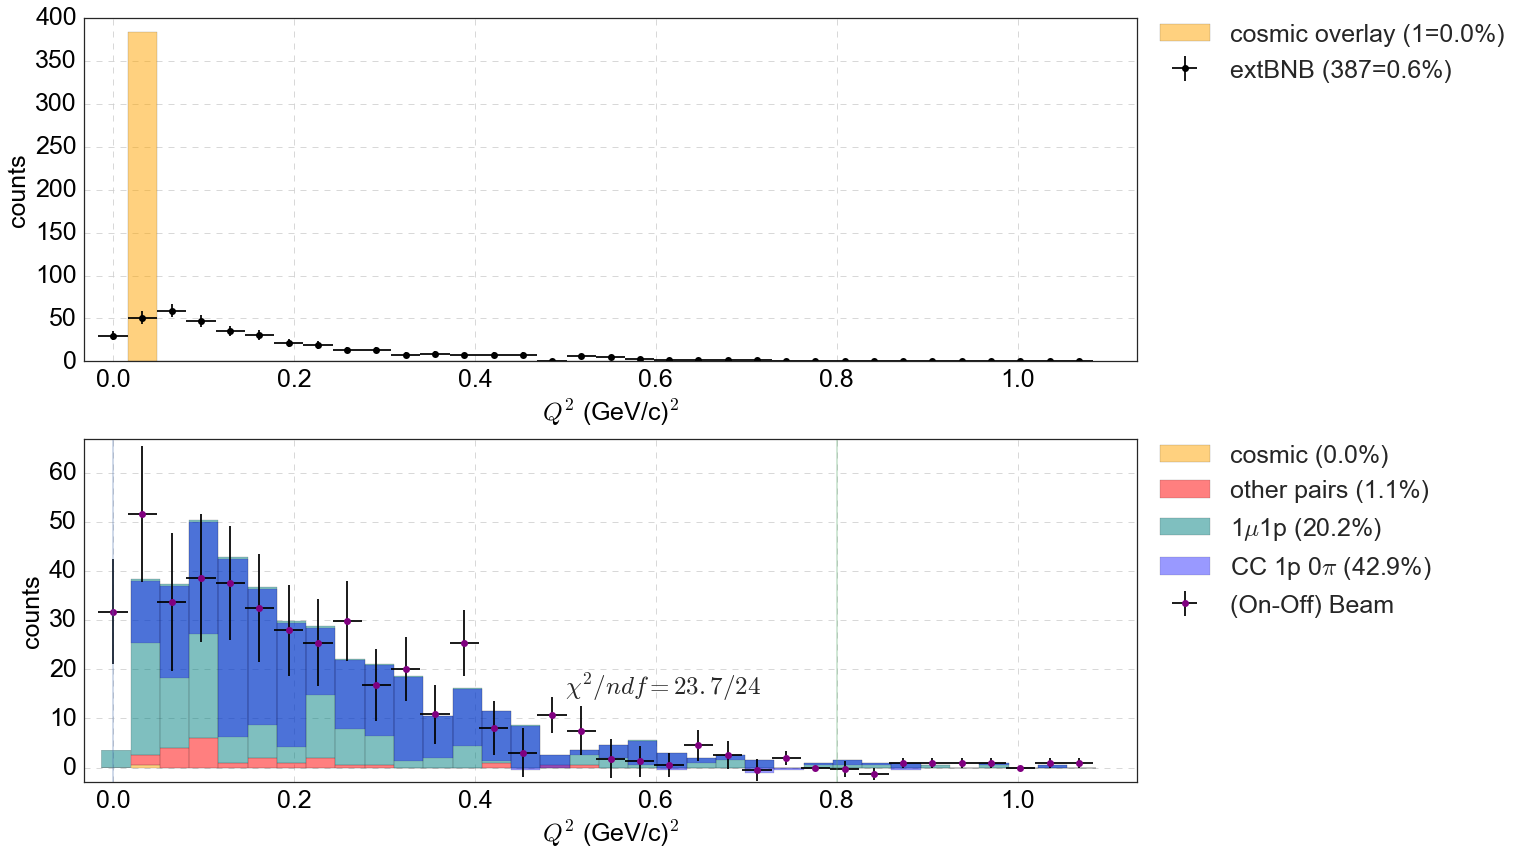

In [18]:
draw_var(cut_name='soft Pt',var='reco_Q2',x_label=r'$Q^2$ (GeV/c)$^2$',bins=np.linspace(0,1.1,35)
             ,do_cosmic_only=True,chi2_xrange=(0.,0.8),chi2_xy=(0.5,15),debug=0
         ,reduced_OnBeam=reduced_OnBeam,reduced_OffBeam=reduced_OffBeam,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples)

# averages

In [ ]:
l_mu = np.concatenate([reduced_MCbnbDATAcosmicSamples['delta phi']['1mu-1p']['l_assigned_muon']
                      ,reduced_MCbnbDATAcosmicSamples['delta phi']['cosmic']['l_assigned_muon']
                       ,reduced_MCbnbDATAcosmicSamples['delta phi']['other pairs']['l_assigned_muon']])
l_mu

In [ ]:
cut_name = 'delta phi'
var = 'l_assigned_muon'
bins = np.linspace(0,150,41)
# MCsamples = reduced_MCbnbDATAcosmicSamples[cut_name]
# avg_l_mu_overlay = np.average(l_mu_overlay)
# print 'average('+var+') in overlay:',avg_l_mu_overlay
observable = np.concatenate([reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p'][var]
                      ,reduced_MCbnbDATAcosmicSamples[cut_name]['cosmic'][var]
                       ,reduced_MCbnbDATAcosmicSamples[cut_name]['other pairs'][var]])
# for i_pair_type in [2,1,0]:
#     pgair_type=pair_types[i_pair_type]
#     sample = MCsamples[pair_type]; 
#     x_array.append(sample[var])
#     weights_array.append (MC_scaling_DATAcosmic * np.ones(len(sample)) )
#     bin_width = bins[1]-bins[0]
h,_=np.histogram( observable , weights=MC_scaling_DATAcosmic*np.ones(len(observable)) , bins=bins )         

avg_h_overlay = np.average(h)
print 'average(h('+var+')) in overlay:',avg_h_overlay
avg_l_mu_overlay = np.average(l_mu_overlay)
print 'average('+var+') in overlay:',avg_l_mu_overlay

# l_mu_off = reduced_MCbnbDATAcosmic[cut_name]['l_mu']

#     h_OnBeam,edges = np.histogram( OnBeamSample[var] , bins=bins )
#     h_OnBeam_err = np.sqrt(h_OnBeam)
#     h_OffBeam,edges = np.histogram( OffBeamSample[var] , bins=bins )
#     h_OffBeam_err = np.sqrt(h_OffBeam)
    
#     h_OnBeam_minus_OffBeam = h_OnBeam - OffBeam_scaling*h_OffBeam
#     h_OnBeam_minus_OffBeam_err = np.sqrt( np.square(h_OnBeam_err) + np.square(OffBeam_scaling*h_OffBeam_err)  )

